## Introduction

Big data is transforming how businesses operate in the digital age by unlocking massive volumes of information and turning them into actionable insights. 
Modern organizations generate enormous datasets every second, from customer clicks and transactions to social media posts and online reviews. 
Managing this data at scale and extracting meaningful patterns is critical for gaining competitive advantage, improving customer experiences, and driving innovation.

## The Scenario

E-Commerce Customer Clickstream & Sentiment Analysis demonstrates how big data concepts can be applied in a realistic, hands-on way. 
In this example, we simulate how an online retailer collects real-time clickstream data (users clicking on product pages) and combines it with customer reviews to understand product performance and customer satisfaction.

By using Python, we replicate a mini big data workflow:
1️⃣ Collecting and aggregating click events (structured data)
2️⃣ Processing and visualizing product popularity
3️⃣ Analyzing unstructured text reviews for sentiment
4️⃣ Creating visual insights with charts and word clouds

This scenario highlights the volume (lots of clicks), velocity (streaming data), variety (structured & unstructured), veracity (clean data analysis), and value (actionable insights) - the core characteristics of big data.

In the real world, companies like Amazon, Netflix, and Walmart use similar pipelines - but on a massive scale - to personalize recommendations, optimize inventory, and improve customer loyalty. 
Learning to replicate these workflows, even in small examples, helps students and professionals understand how big data technologies add value in modern business.

In [4]:
!pip install wordcloud==1.9.4

# Big Data Concepts - Python Scenario for Gamma Presentation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 33.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
# 1️⃣ Simulate clickstream data
np.random.seed(42)
n = 1000
clickstream = pd.DataFrame({
    'session_id': np.random.randint(1000, 2000, n),
    'product_id': np.random.choice(['A', 'B', 'C', 'D'], n),
    'click_time': pd.date_range('2025-01-01', periods=n, freq='T')
})
print("Clickstream sample:")
print(clickstream.head())

Clickstream sample:
   session_id product_id          click_time
0        1102          A 2025-01-01 00:00:00
1        1435          A 2025-01-01 00:01:00
2        1860          C 2025-01-01 00:02:00
3        1270          D 2025-01-01 00:03:00
4        1106          A 2025-01-01 00:04:00


## ✅Insight on the Clickstream Sample Output

  session_id--> A unique identifier for each user’s browsing session.
  product_id--> The product viewed or clicked by the user.
  click_time--> The timestamp when the click happened.

  Each row represents one (1) click event by a user at a specific time on a specific product.

### What It Tells Us?

This structured data shows how the simulated e-commerce site records interactions in real-time — each line is like a log entry.
The first 5 clicks come from different session IDs — so multiple users are browsing different products (`A`, `C`, `D`) at slightly different timestamps.
This simple table illustrates big data’s volume and velocity — imagine this table growing to millions of rows per hour in a real store like Amazon!

### How It’s Used?

Aggregate--> Count clicks per product → find the most viewed items.
Analyze Patterns--> Look for peak traffic times, repeat sessions.
Predict-->  Combine with purchase data to forecast sales trends.
Optimize--> Improve page layouts, suggest cross-sells, personalize offers.

### 📌 Key Insight

This basic output is the first step in a big data pipeline — raw clickstream logs become valuable business intelligence when cleaned, aggregated, and visualized!


Clicks per product:
  product_id  clicks
0          A     264
1          B     261
2          C     261
3          D     214


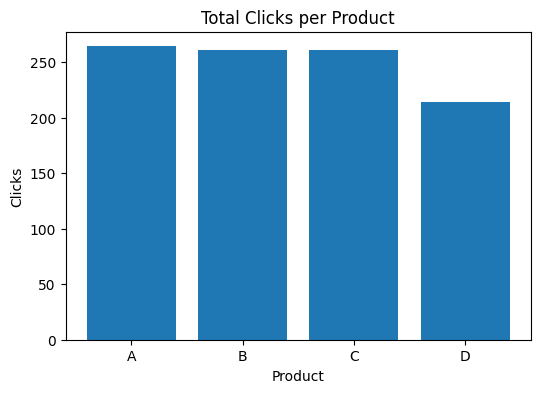

In [10]:
# 2️⃣ Aggregate clicks per product
click_counts = clickstream.groupby('product_id').size().reset_index(name='clicks')
print("\nClicks per product:")
print(click_counts)

plt.figure(figsize=(6,4))
plt.bar(click_counts['product_id'], click_counts['clicks'])
plt.title('Total Clicks per Product')
plt.xlabel('Product')
plt.ylabel('Clicks')
plt.show()

## ✅Insight on Clicks per Product Table & Bar Chart

This is is a  combination of:  
1️⃣ A table--> the output of `groupby` aggregation showing total clicks per product
2️⃣ A bar chart--> visualizing those totals for quick comparison

Product A--> 264 clicks (most popular)
Product B--> 261 clicks
Product C--> 261 clicks
Product D--> 214 clicks (least popular)

So, Products A, B, and C are almost equally popular, while Product D lags behind.

### Business Interpretation

The chart immediately reveals customer interest levels across products.

Product D might need:

 Better placement on the website
 Improved marketing or promotions
 Or further investigation (is it out of stock? unappealing?)

 Products A–C could be prioritized for:

  Featured listings
  Cross-selling
  Bundled offers

### Big Data Relevance

This is a classic descriptive analytics step in a big data workflow.
The aggregation turns raw clickstream logs into actionable KPIs.
In a real scenario, the company might track this daily, weekly, or hourly in dashboards (Tableau, Power BI) to respond quickly.

This chart illustrates how big data enables organizations to spot patterns in customer behavior. By monitoring click counts, managers can make data-driven decisions about product placement, promotions, and inventory management.

In [13]:
# 3️⃣ Simulate customer reviews
reviews = [
    "Love this product! Highly recommend it.",
    "Terrible quality, waste of money.",
    "Good value for the price.",
    "Not bad, but could be better.",
    "Absolutely fantastic! Will buy again.",
    "Worst experience ever.",
    "Satisfied with my purchase.",
    "Couldn’t be happier."
]

reviews_df = pd.DataFrame({'review': np.random.choice(reviews, 50)})
print("\nSample reviews:")
print(reviews_df.head())


Sample reviews:
                                    review
0        Terrible quality, waste of money.
1                     Couldn’t be happier.
2              Satisfied with my purchase.
3  Love this product! Highly recommend it.
4              Satisfied with my purchase.


This sample reviews points out a  of customer review text — the raw unstructured data collected in the scenario for sentiment analysis.

The review column holds short text feedback from customers.

Each row is a different customer’s opinion about their purchase or experience.

### What the Reviews Reveal?

There’s a mix of positive and negative sentiment:

Positive--> “Couldn’t be happier.”, “Satisfied with my purchase.”, “Love this product! Highly recommend it.”

Negative--> “Terrible quality, waste of money.”

Such reviews directly show veracity (truthfulness) challenges: some feedback is glowing, some is critical — both must be analyzed.

### Why This Matters in Big Data?

Unlike clicks or sales data (structured), reviews are unstructured → need NLP tools to interpret.

### Sentiment scores help companies:

Gauge customer satisfaction at scale

Detect product quality issues

Improve products or customer service

### How?

In this scenario:

Each review’s polarity is calculated with TextBlob (-1 = negative, +1 = positive).

Scores are then visualized in a histogram to show overall sentiment trends.

Insights can be combined with click data to find products with high interest but poor reviews — so managers can act.

### Key Takeaway for a Slide or Report

These raw reviews illustrate the power of big data analytics to turn scattered text feedback into measurable insights that guide product improvements and customer experience strategy.

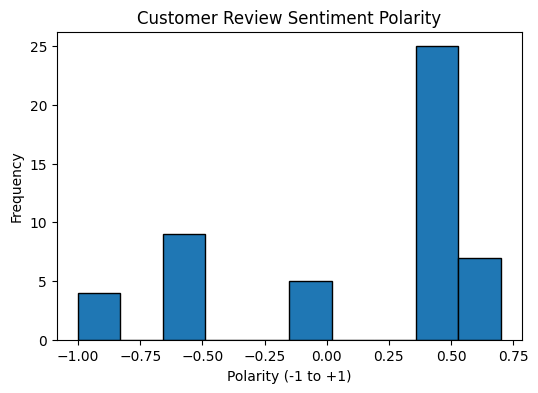

In [16]:
# 4️⃣ Sentiment analysis
reviews_df['polarity'] = reviews_df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(6,4))
plt.hist(reviews_df['polarity'], bins=10, edgecolor='k')
plt.title('Customer Review Sentiment Polarity')
plt.xlabel('Polarity (-1 to +1)')
plt.ylabel('Frequency')
plt.show()

## ✅ Insight on the Customer Review Sentiment Polarity Histogram

---

This histogram visualizes the **sentiment polarity** scores calculated for customer reviews using the `TextBlob` tool.

X-axis (Polarity -1 to +1):

  `-1` = very negative sentiment
  `0` = neutral sentiment
  `+1` = very positive sentiment

Y-axis (Frequency):

 Shows how many reviews fall into each sentiment range.

### Key Findings in This Chart

Most reviews have positive polarity around +0.5 — indicating that many customers left satisfied or happy feedback.
A smaller number of reviews fall into strongly negative polarity ranges (-1.0 to -0.5).
There’s a small peak near zero, representing neutral or mixed reviews.

### Why This Matters for Big Data?

This simple chart demonstrates:

How unstructured text is turned into quantitative insight.
How managers can measure customer satisfaction at scale.
Polarity scores can be tracked over time — for example, after product updates, launches, or marketing campaigns.

### Practicality

A product with high click volume but mostly negative sentiment may need urgent fixes. Conversely, a product with high clicks and high positive sentiment could be promoted more heavily.

### Key Takeaway 

This histogram transforms subjective customer opinions into measurable scores. Big data analytics like sentiment analysis help businesses monitor satisfaction, identify pain points, and guide decisions for product improvement and marketing.”*

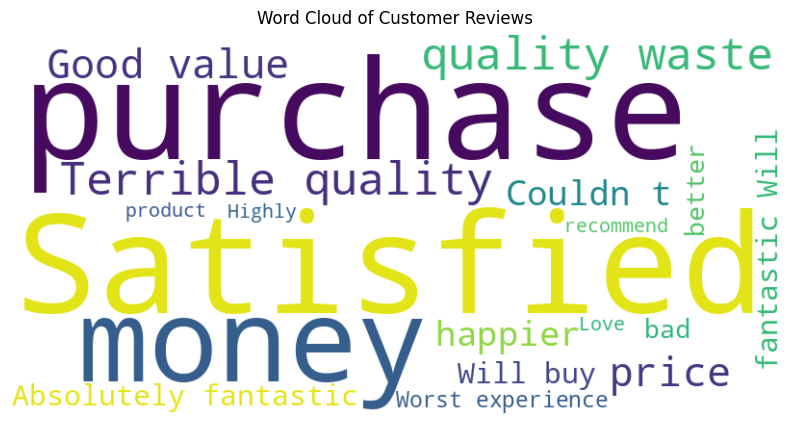

In [19]:
# 5️⃣ Word Cloud
all_text = " ".join(reviews_df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()

## ✅ Insight on the Word Cloud of Customer Reviews

This word cloud visualizes the most frequent words found in the customer reviews dataset from your scenario.

The bigger the word, the more often it appears in the text.
Colors help distinguish different keywords but do not imply sentiment by themselves.

### Key Observations

Most prominent words --> “Satisfied”, “purchase”, “money” — suggest that many customers mention satisfaction and the value they get for their money.
Positive signals--> Words like “Satisfied”, “Good value”, “Absolutely fantastic”, “recommend”, “Love”, “happier” stand out.
Negative signals-->  Words like “Terrible quality”, “waste”, “Worst experience”, “bad” also appear, highlighting mixed feedback.

### Why This Matters in Big Data:

A word cloud is a quick visual snapshot of what customers care about — it helps managers and analysts:

Identify common topics and pain points without reading every review.
Spot trends or repetitive issues (e.g., “quality” + “terrible” + “waste” may indicate product defects).
Combine this with sentiment scores (from the histogram) for deeper insight.

### Practical Real-World Example:

E-commerce teams use similar word clouds in dashboards to check daily or weekly what customers are talking about. This informs marketing**, product design, and customer service priorities.

### Key Takeaway 

The word cloud reveals the voice of the customer at a glance. Combining this unstructured text insight with structured clickstream data empowers businesses to make informed, customer-focused improvements.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52e2aae5-a628-4d89-b910-66fc29dee731' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>